In [15]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

import numpy as np
import matplotlib.pyplot as plt

import random

In [16]:
random.seed(0)

## iris data set example

In [17]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [25]:
# write iris data to csv file
with open('examples/iris.csv', 'w') as f:
    for i in range(len(X)):
        f.write(','.join(map(str, X[i])) + ',' + str(y[i]) + '\n')

# write col names to csv file
with open('examples/iris_col_names.csv', 'w') as f:
    f.write(','.join(iris.feature_names) + ',target\n')
    for i in range(len(X)):
        f.write(','.join(map(str, X[i])) + ',' + str(y[i]) + '\n')

In [19]:
# what are the classes?
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [20]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.4, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.663\nsamples = 96\nvalue = [37, 30, 29]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.35, 0.8333333333333333, 'True  '),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.5\nsamples = 59\nvalue = [0, 30, 29]'),
 Text(0.45, 0.8333333333333333, '  False'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.17\nsamples = 32\nvalue = [0, 29, 3]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(0.3, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.4, 0.25, 'x[1] <= 2.85\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\ngini = 0.071\nsamples = 27\nvalue = [0, 1, 26]'),
 Tex

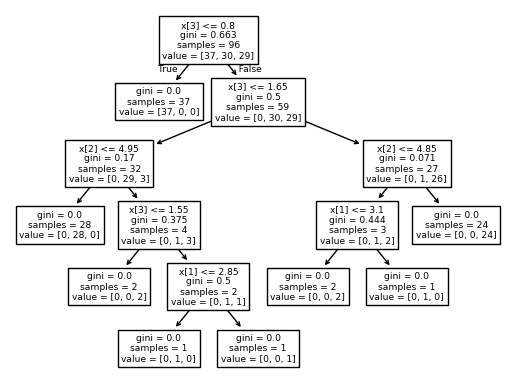

In [21]:
tree.plot_tree(tree_clf)

gini is 

In [26]:
tree_clf.score(X_val, y_val)

1.0

## Random Forests

Decision Tree Accuracy:  1.0
Random Forest Accuracy:  1.0
[0.11873573 0.0581471  0.45025646 0.37286071]


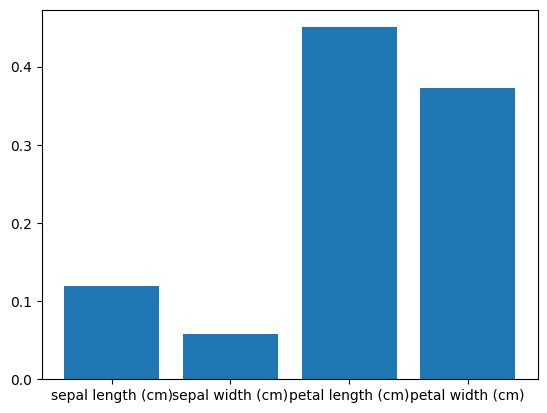

In [22]:
rf_clf = RandomForestClassifier(n_estimators=10)
rf_clf.fit(X_train, y_train)

print("Decision Tree Accuracy: ", accuracy_score(y_val, tree_clf.predict(X_val)))

print("Random Forest Accuracy: ", accuracy_score(y_val, rf_clf.predict(X_val)))

# let's see the feature importances
print(rf_clf.feature_importances_)
plt.bar(iris.feature_names, rf_clf.feature_importances_)
plt.show()

In [23]:
# grab the DOT code of the decision tree
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file="tree.dot", feature_names=iris.feature_names, class_names=iris.target_names, rounded=True, filled=True)

Looking at the tree we see these branches

|#  |if                  |class                |
|---|--------------------|---------------------|
|1  |petal len <= 2.45   | setosa, [30,0,0]    |
|2  |petal width <= 1.65 | virginica, [0,30,36]|
|2.5|!petal width <= 1.65| virginia, [0,0,34]  |
|3  |petal len <= 5.0    | versicolor, [0,30,2]|
|3.5|!petal len <= 5.0   | virginica, [0,0,2]  |

Here is another table

|Feature|	Condition|	True Branch|	False Branch|
|-------|------------|-------------|----------------|
|petal length (cm)	|<= 2.45|	Setosa	|Petal width (cm) <= 1.65|
|petal width (cm)	|<= 1.65|	Setosa	|Virginica|
|petal length (cm)	|<= 5.0|	Versicolor	|Virginica|
|petal length (cm)	|<= 5.0|	Versicolor	|Virginica|

| Feature | Condition | True Branch | False Branch | Class Label | Gini Index |
|---|---|---|---|---|---|
| petal length (cm) | <= 2.45 | Setosa | Petal width (cm) <= 1.65 | Setosa | 0.664 |
| petal width (cm) | <= 1.65 | Setosa | Virginica | Setosa | 0.496 |
| petal length (cm) | <= 5.0 | Versicolor | Virginica | Versicolor | 0.117 |
| petal length (cm) | <= 5.0 | Versicolor | Virginica | Virginica | 0.0 |